In [1]:
import matplotlib.pyplot as plt
import numpy as np
import veloxchem as vlx

In [2]:
mol_str = """
Cl   0.0     0.0   0.0
H    1.274   0.0   0.0
"""

molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")

basis_set_label = "6-31+G"
basis = vlx.MolecularBasis.read(molecule, basis_set_label)

scf_settings = {"conv_thresh": 1.0e-6}
method_settings = {"xcfun": "b3lyp", "grid_level": 4}

In [3]:
num_drv = vlx.NumerovDriver()
num_drv.print_keywords()

                  @numerov                                                                                                
                ------------------------------------------------------------------------------------------                
                  pec_displacements  sequence    PEC scanning range [bohr]                                                
                  pec_potential      string      potential type for fitting                                               
                  reduced_mass       float       reduced mass of the molecule                                             
                  el_transition      boolean     include an electronic transition                                         
                  final_el_state     integer     final state of the electronic transition                                 
                  exc_conv_thresh    float       excited state calculation threshold                                      
                

In [4]:
numerov_settings = {
    "n_vib_states": 4,
    "pec_displacements": "-0.3 - 0.9 (0.2)",
    "el_transition": "no",
    "pec_potential": "morse",
    "n_rot_states": 10,
}
num_drv.update_settings(numerov_settings, scf_settings, method_settings)
num_results = num_drv.compute(molecule, basis)

                                                                                                                          
                                           Potential Energy Curve Driver Setup                                            
                                                                                                                          
                              Number of Geometries          : 7                                                           
                              Wave Function Model           : Spin-Restricted Kohn-Sham                                   
                              SCF Convergece Threshold      : 1.0e-06                                                     
                              DFT Functional                : B3LYP                                                       
                              Molecular Grid Level          : 4                                                           
                

               *** Geometry 1/7:  Initial state converged                                                                 


               *** Geometry 2/7:  Initial state converged                                                                 


               *** Geometry 3/7:  Initial state converged                                                                 


               *** Geometry 4/7:  Initial state converged                                                                 


               *** Geometry 5/7:  Initial state converged                                                                 


               *** Geometry 6/7:  Initial state converged                                                                 


               *** Geometry 7/7:  Initial state converged                                                                 


                                                                                                                          
               Potential Energy Curve Information                                                                         
               ----------------------------------                                                                         
                                               rel. GS energy                                                             
               Bond distance:     1.1152 angs      0.85540 eV                                                             
               Bond distance:     1.2211 angs      0.16191 eV                                                             
               Bond distance:     1.3269 angs      0.00000 eV                                                             
               Bond distance:     1.4328 angs      0.13406 eV                                                             
               B

                                                                                                                          
                                                   Numerov Driver Setup                                                   
                                                                                                                          
                                         Number of Vibrational States : 4                                                 
                                         Energy Convergence Threshold : 1.0e-12                                           
                                         Max. Number of Iterations    : 1000                                              
                                         Grid Points per Bohr Radius  : 500                                               
                                         Margin right of scanned PEC  : 1.50                                              
                

               *** Vibronic state 0 converged in 109 iterations                                                           


               *** Vibronic state 1 converged in 171 iterations                                                           


               *** Vibronic state 2 converged in 161 iterations                                                           


               *** Vibronic state 3 converged in 144 iterations                                                           


                                                                                                                          
               *** All vibronic states converged for the initial electronic state                                         
                                                                                                                          


               Rovibronic IR Spectrum                                                                                     
               ----------------------                                                                                     
                           Excitation energy    Oscillator strength                                                       
               P Branch                                                                                                   
                                2615.49 cm-1            3.94747e-09                                                       
                                2595.85 cm-1            5.44302e-09                                                       
                                2576.21 cm-1            5.73425e-09                                                       
                                2556.57 cm-1            5.04621e-09                                                       
                

In [5]:
print(num_results.keys())

dict_keys(['grid', 'potential', 'psi', 'vib_levels', 'excitation_energies', 'oscillator_strengths'])


In [6]:
grid = num_results["grid"]
potential = num_results["potential"]

vib_psi2 = num_results["psi"] ** 2
vib_energies = num_results["vib_levels"]

exc = num_results["excitation_energies"]
osc = num_results["oscillator_strengths"]

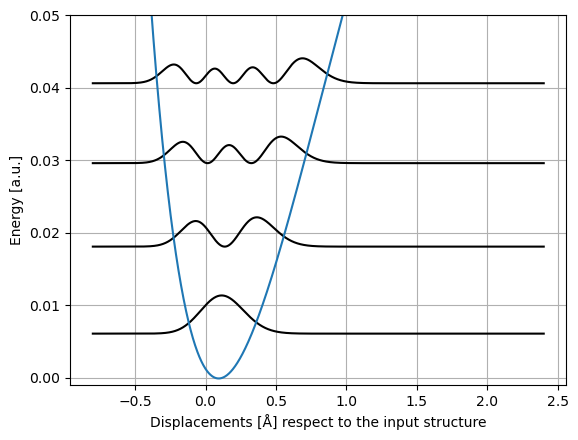

In [7]:
fig, ax1 = plt.subplots()

for energy, psi2 in zip(vib_energies, vib_psi2):
    ax1.plot(grid, energy + psi2, "k")

ax = plt.subplot()
ax.plot(grid, potential)
ax.set_ylim(-0.001, 0.05)
ax.set_xlabel("Displacements [Å] respect to the input structure")
ax.set_ylabel("Energy [a.u.]")

plt.grid(True)

plt.show()

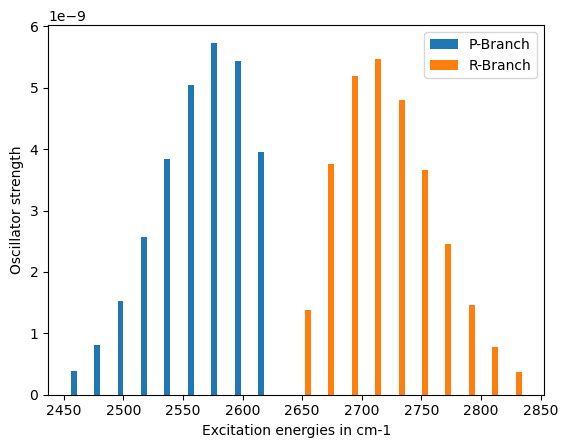

In [8]:
ax1 = plt.bar(exc["P"], osc["P"], width=5.0, label="P-Branch")
ax2 = plt.bar(exc["R"], osc["R"], width=5.0, label="R-Branch")
plt.xlabel("Excitation energies in cm-1")
plt.ylabel("Oscillator strength")
plt.legend()

plt.show()

In [9]:
num_drv = vlx.NumerovDriver()

numerov_settings = {
    "n_vib_states": 3,
    "pec_displacements": "-0.3 - 0.9 (0.2)",
    "el_transition": "yes",
    "final_el_state": 2,
    "pec_potential": "morse",
}
num_drv.update_settings(numerov_settings, scf_settings, method_settings)
num_results = num_drv.compute(molecule, basis)

                                                                                                                          
                                           Potential Energy Curve Driver Setup                                            
                                                                                                                          
                              Number of Geometries          : 7                                                           
                              Wave Function Model           : Spin-Restricted Kohn-Sham                                   
                              SCF Convergece Threshold      : 1.0e-06                                                     
                              DFT Functional                : B3LYP                                                       
                              Molecular Grid Level          : 4                                                           
                

               *** Geometry 1/7:  Initial state converged,  Final state converged                                         


               *** Geometry 2/7:  Initial state converged,  Final state converged                                         


               *** Geometry 3/7:  Initial state converged,  Final state converged                                         


               *** Geometry 4/7:  Initial state converged,  Final state converged                                         


               *** Geometry 5/7:  Initial state converged,  Final state converged                                         


               *** Geometry 6/7:  Initial state converged,  Final state converged                                         


               *** Geometry 7/7:  Initial state converged,  Final state converged                                         


                                                                                                                          
               Potential Energy Curve Information                                                                         
               ----------------------------------                                                                         
                                               rel. GS energy  rel. ES energy                                             
               Bond distance:     1.1152 angs      0.85540 eV     11.00371 eV                                             
               Bond distance:     1.2211 angs      0.16191 eV     10.18856 eV                                             
               Bond distance:     1.3269 angs      0.00000 eV      9.77836 eV                                             
               Bond distance:     1.4328 angs      0.13406 eV      9.68682 eV                                             
               B

                                                                                                                          
                                                   Numerov Driver Setup                                                   
                                                                                                                          
                                         Number of Vibrational States : 3                                                 
                                         Energy Convergence Threshold : 1.0e-12                                           
                                         Max. Number of Iterations    : 1000                                              
                                         Grid Points per Bohr Radius  : 500                                               
                                         Margin right of scanned PEC  : 1.50                                              
                

               *** Vibronic state 0 converged in 105 iterations                                                           


               *** Vibronic state 1 converged in 174 iterations                                                           


               *** Vibronic state 2 converged in 162 iterations                                                           


                                                                                                                          
               *** All vibronic states converged for the initial electronic state                                         
                                                                                                                          


               *** Vibronic state 0 converged in 101 iterations                                                           


               *** Vibronic state 1 converged in 137 iterations                                                           


               *** Vibronic state 2 converged in 146 iterations                                                           


                                                                                                                          
               *** All vibronic states converged for the final electronic state                                           
                                                                                                                          


               UV/vis Absorption/Emission Spectrum                                                                        
               -----------------------------------                                                                        
                             Excitation energy    Oscillator strength                                                     
               Absorption                                                                                                 
                                 78431.04 cm-1            2.62970e-01                                                     
                                 80560.28 cm-1            5.18422e-02                                                     
                                 82592.21 cm-1            3.98799e-03                                                     
               Emission                                                                                                   
                

In [10]:
print(num_results.keys())

dict_keys(['grid', 'i_potential', 'i_psi', 'i_vib_levels', 'f_potential', 'f_psi', 'f_vib_levels', 'excitation_energies', 'oscillator_strengths'])


In [11]:
grid = num_results["grid"]

dE_elec = np.min(num_drv.pec_energies["f"]) - np.min(num_drv.pec_energies["i"])

gs_potential = num_results["i_potential"]
gs_vib_psi2 = num_results["i_psi"] ** 2
gs_vib_energies = num_results["i_vib_levels"]

es_potential = num_results["f_potential"]
es_vib_psi2 = num_results["f_psi"] ** 2
es_vib_energies = num_results["f_vib_levels"]

exc = num_results["excitation_energies"]
osc = num_results["oscillator_strengths"]

In [12]:
displacements = num_drv.pec_displacements
gs_energies = num_drv.pec_energies["i"]
es_energies = num_drv.pec_energies["f"]

delta_E = np.min(es_energies) - np.min(gs_energies)

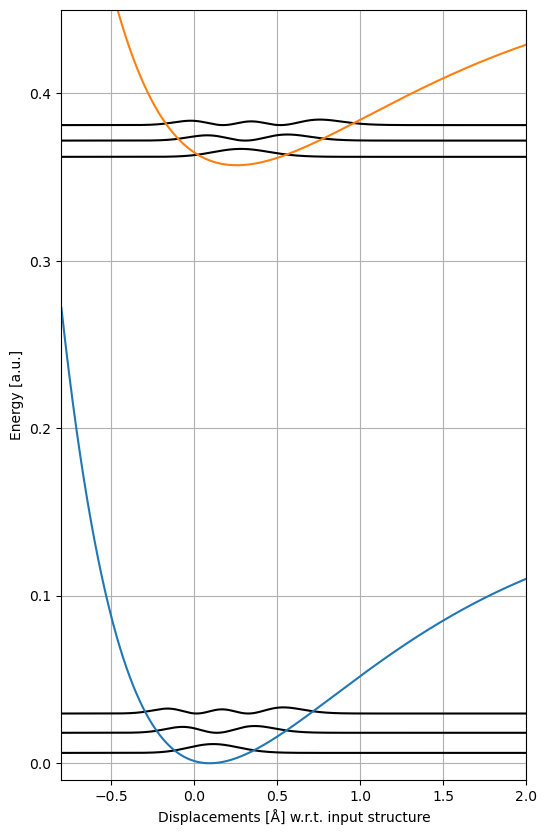

In [13]:
fig, ax1 = plt.subplots(figsize=(6, 10))

for energy, psi2 in zip(gs_vib_energies, gs_vib_psi2):
    ax1.plot(grid, energy + psi2, "k")

for energy, psi2 in zip(es_vib_energies, es_vib_psi2):
    ax1.plot(grid, delta_E + energy + psi2, "k")

ax = plt.subplot()
ax.plot(grid, gs_potential)
ax.plot(grid, es_potential + delta_E)
ax.set_xlim(-0.8, 2.0)
ax.set_ylim(-0.01, 0.45)
ax.grid(True)
ax.set_xlabel("Displacements [Å] w.r.t. input structure")
ax.set_ylabel("Energy [a.u.]")

plt.show()

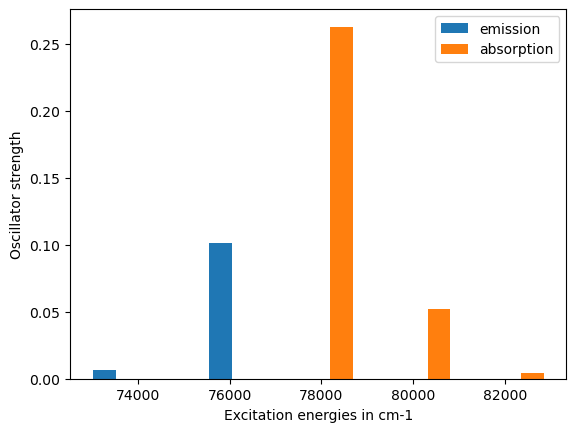

In [14]:
plt.bar(exc["emission"], osc["emission"], width=500.0, label="emission")
plt.bar(exc["absorption"], osc["absorption"], width=500.0, label="absorption")

plt.legend()
plt.xlabel("Excitation energies in cm-1")
plt.ylabel("Oscillator strength")

plt.show()

In [15]:
num_drv = vlx.NumerovDriver()

In [16]:
x = np.arange(-0.7, 2.01, 0.1)

delta_E = 0.2

bond_lengths = x + 2.0
gs_energies = 0.75 * x**2
es_energies = 0.5 * (x - 0.35) ** 2 + delta_E

tmom = [0, 0, 1.0]
trans_moments = [tmom for displacement in x]

In [17]:
num_drv.read_pec_data(bond_lengths, trans_moments, gs_energies, es_energies)

num_drv.set_reduced_mass(1.0)

numerov_settings = {
    "n_vib_states": 10,
    "el_transition": "yes",
    "final_el_state": 1,
    "pec_potential": "harmonic",
}
num_drv.update_settings(numerov_settings, scf_settings, method_settings)

In [18]:
num_results = num_drv.compute()

                                                                                                                          
                                                   Numerov Driver Setup                                                   
                                                                                                                          
                                         Number of Vibrational States : 10                                                
                                         Energy Convergence Threshold : 1.0e-12                                           
                                         Max. Number of Iterations    : 1000                                              
                                         Grid Points per Bohr Radius  : 500                                               
                                         Margin right of scanned PEC  : 1.50                                              
                

               *** Vibronic state 0 converged in 120 iterations                                                           


               *** Vibronic state 1 converged in 194 iterations                                                           


               *** Vibronic state 2 converged in 193 iterations                                                           


               *** Vibronic state 3 converged in 190 iterations                                                           


               *** Vibronic state 4 converged in 191 iterations                                                           


               *** Vibronic state 5 converged in 187 iterations                                                           


               *** Vibronic state 6 converged in 188 iterations                                                           


               *** Vibronic state 7 converged in 194 iterations                                                           


               *** Vibronic state 8 converged in 195 iterations                                                           


               *** Vibronic state 9 converged in 200 iterations                                                           


                                                                                                                          
               *** All vibronic states converged for the initial electronic state                                         
                                                                                                                          


               *** Vibronic state 0 converged in 103 iterations                                                           


               *** Vibronic state 1 converged in 172 iterations                                                           


               *** Vibronic state 2 converged in 167 iterations                                                           


               *** Vibronic state 3 converged in 170 iterations                                                           


               *** Vibronic state 4 converged in 170 iterations                                                           


               *** Vibronic state 5 converged in 167 iterations                                                           


               *** Vibronic state 6 converged in 172 iterations                                                           


               *** Vibronic state 7 converged in 173 iterations                                                           


               *** Vibronic state 8 converged in 171 iterations                                                           


               *** Vibronic state 9 converged in 167 iterations                                                           


                                                                                                                          
               *** All vibronic states converged for the final electronic state                                           
                                                                                                                          


               UV/vis Absorption/Emission Spectrum                                                                        
               -----------------------------------                                                                        
                             Excitation energy    Oscillator strength                                                     
               Absorption                                                                                                 
                                 43314.88 cm-1            5.67445e-04                                                     
                                 46035.10 cm-1            3.61293e-03                                                     
                                 48755.33 cm-1            1.10780e-02                                                     
                                 51475.56 cm-1            2.17810e-02                                                     
                

In [19]:
grid = num_results["grid"]

gs_potential = num_results["i_potential"]
gs_psi2 = num_results["i_psi"] ** 2
gs_vib_energies = num_results["i_vib_levels"]

es_potential = num_results["f_potential"]
es_psi2 = num_results["f_psi"] ** 2
es_vib_energies = num_results["f_vib_levels"]

exc = num_results["excitation_energies"]
osc = num_results["oscillator_strengths"]

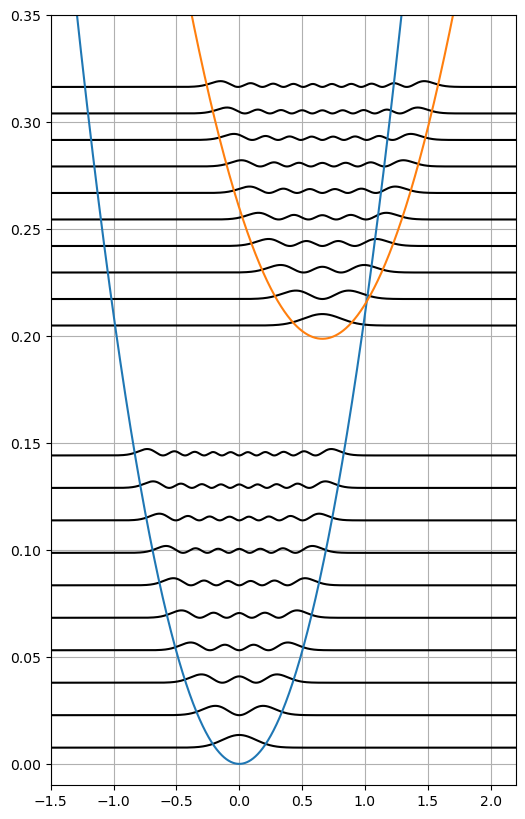

In [20]:
fig, ax1 = plt.subplots(figsize=(6, 10))

for energy, psi2 in zip(gs_vib_energies, gs_psi2):
    ax1.plot(grid, energy + psi2, "k")

for energy, psi2 in zip(es_vib_energies, es_psi2):
    ax1.plot(grid, delta_E + energy + psi2, "k")

ax = plt.subplot()

ax.plot(grid, gs_potential)
ax.plot(grid, es_potential + delta_E)

ax.set_xlim(-1.5, 2.2)
ax.set_ylim(-0.01, 0.35)

ax.grid(True)

plt.show()

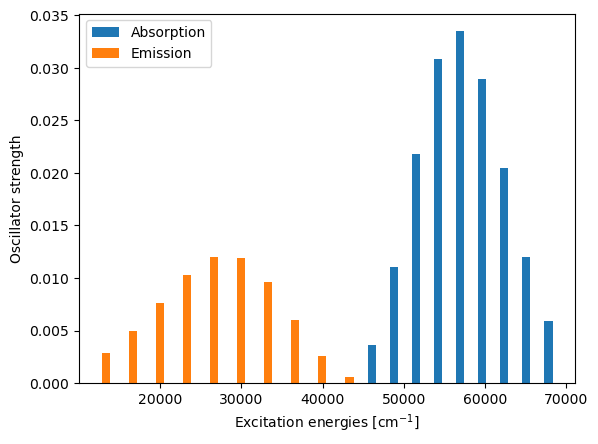

In [21]:
plt.bar(exc["absorption"], osc["absorption"], width=1000.0, label="Absorption")
plt.bar(exc["emission"], osc["emission"], width=1000.0, label="Emission")

plt.legend()
plt.xlabel(r"Excitation energies [cm$^{-1}$]")
plt.ylabel("Oscillator strength")

plt.show()